# Implementation

## Libraries

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

## Data

### Load data

In [2]:
boston_listings_df = pd.read_csv('drafts/data/boston/listings.csv')

### Boston

In [3]:
print("Size of Boston data: ", boston_listings_df.shape)

Size of Boston data:  (3585, 95)


#### Check Nan values

<AxesSubplot:title={'center':'Missing values per column, %'}>

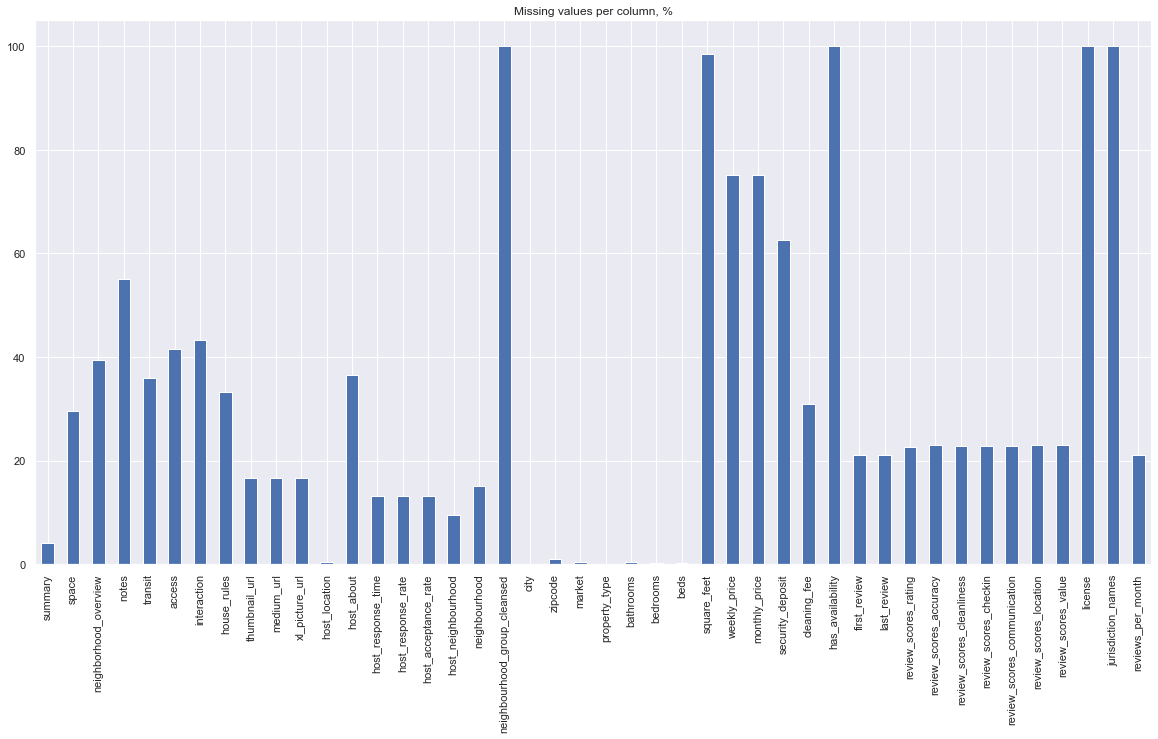

In [4]:
# Find percentage of missing values for each column
boston_listings_missing_df = boston_listings_df.isnull().mean()*100

# Filter out only columns, which have missing values
boston_listings_columns_nan = boston_listings_missing_df[boston_listings_missing_df > 0]

# plot the results
boston_listings_columns_nan.plot.bar(title='Missing values per column, %', figsize=(20,10))

#### Procesing data for visualization

In [5]:
# Drop unuse columns
cols = ['id','name','summary','longitude','latitude','space','description',
             'instant_bookable','neighborhood_overview','neighbourhood_cleansed',
             'host_id','host_name','host_since', 'host_response_time','street', 
             'zipcode','review_scores_rating','property_type','room_type','accommodates',
             'bathrooms','bedrooms','beds','reviews_per_month','amenities','cancellation_policy',
             'number_of_reviews','price']

boston_listings_df = boston_listings_df[cols]

print('Size of seattle data before drop:', boston_listings_df.shape)

Size of seattle data before drop: (3585, 28)


In [6]:
# Check duplicates values
print('Duplicate values:', boston_listings_df.duplicated().sum())

Duplicate values: 0


##### Drop rows with Nan values

In [7]:
# Replace NaN values with 0
boston_listings_df.fillna(0, inplace=True)

# Convert price columns to float type
priceDF = boston_listings_df['price']
# Create an empty prices list
prices=[]

# Convert prices into float values and append it in prices list
for p in priceDF:
    p = float(p[1:].replace(',',''))
    prices.append(p)
    
# Replace the price column in the original with the new prices
boston_listings_df['price'] = prices

In [8]:
boston_listings_df = boston_listings_df[boston_listings_df['bedrooms'] > 0]
boston_listings_df = boston_listings_df[boston_listings_df['bathrooms'] > 0]
boston_listings_df = boston_listings_df[boston_listings_df['accommodates'] > 0]
boston_listings_df = boston_listings_df[boston_listings_df['price'] > 0]
boston_listings_df = boston_listings_df[boston_listings_df['beds'] > 0]
boston_listings_df = boston_listings_df[boston_listings_df['review_scores_rating'] > 0]
boston_listings_df = boston_listings_df[boston_listings_df['reviews_per_month'] > 0]

print('Size of Boston data after drop rows:', boston_listings_df.shape)

Size of Boston data after drop rows: (2506, 28)


#### Understand data

In [9]:
boston_listings_df.describe()

,id,longitude,latitude,host_id,review_scores_rating,accommodates,bathrooms,bedrooms,beds,reviews_per_month,number_of_reviews,price
count,2.506000e+03,2506.000000,2506.000000,2.506000e+03,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000
mean,7.639873e+06,-71.083943,42.338373,2.282488e+07,92.004789,3.143256,1.240024,1.370311,1.671588,2.005551,24.454509,168.485634
std,4.396014e+06,0.032389,0.025586,2.191839e+07,9.617514,1.882748,0.514025,0.697973,1.090096,2.143736,38.152113,117.499976
min,3.353000e+03,-71.171469,42.235942,4.240000e+03,20.000000,1.000000,0.500000,1.000000,1.000000,0.010000,1.000000,11.000000
25%,4.047033e+06,-71.106233,42.323982,5.235073e+06,89.000000,2.000000,1.000000,1.000000,1.000000,0.500000,3.000000,80.000000
50%,7.741079e+06,-71.077351,42.344332,1.644292e+07,95.000000,2.000000,1.000000,1.000000,1.000000,1.230000,10.000000,144.500000
75%,1.177128e+07,-71.061016,42.355023,3.299663e+07,99.000000,4.000000,1.000000,2.000000,2.000000,2.775000,29.000000,225.000000
max,1.484378e+07,-71.000100,42.389982,9.287818e+07,100.000000,16.000000,6.000000,5.000000,16.000000,19.150000,320.000000,1300.000000


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

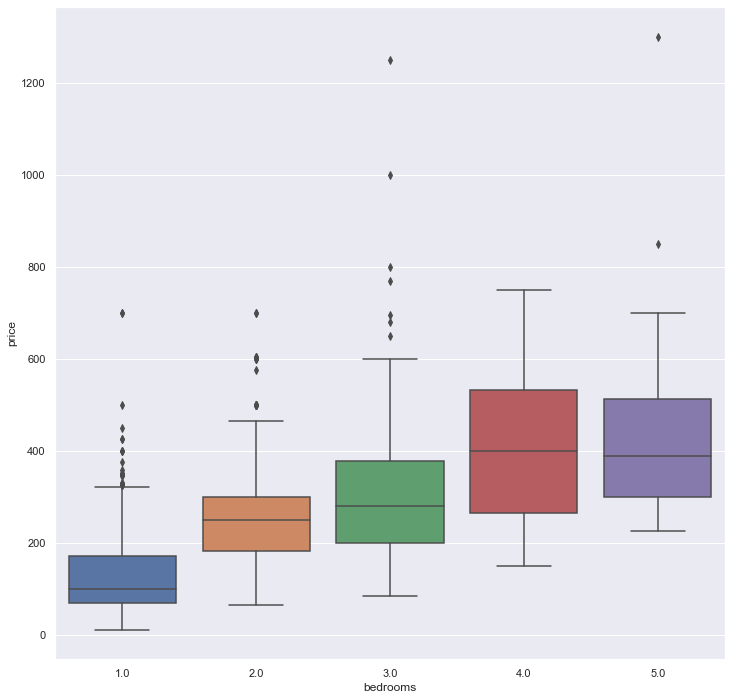

In [10]:
# Plotting a boxplot to quickly see if there is any trend between price and no. bedrooms
plt.figure(figsize=(12,12))
sb.boxplot(x='bedrooms', y='price', data=boston_listings_df[['bedrooms', 'price']])

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

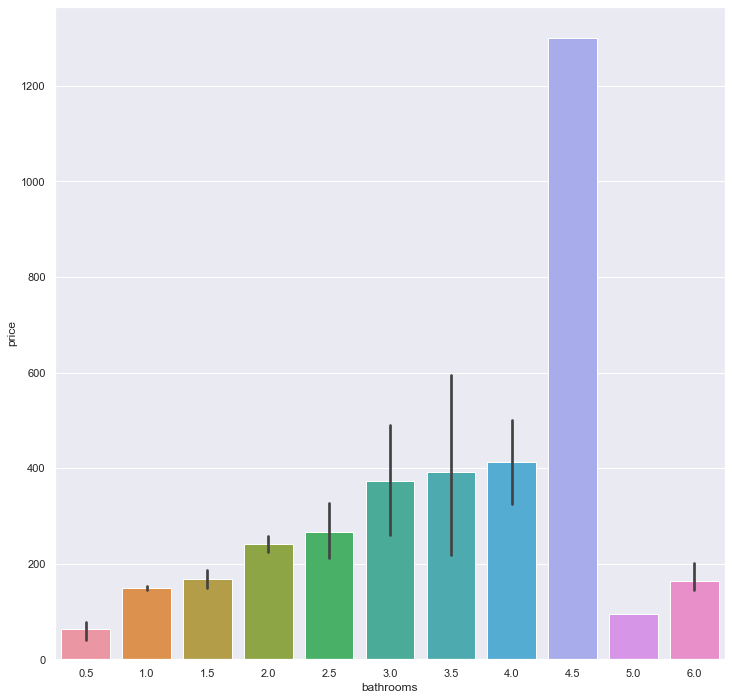

In [11]:
# Plotting a boxplot to quickly see if there is any trend between price and no. bathrooms
plt.figure(figsize=(12,12))
sb.barplot(x='bathrooms', y='price', data=boston_listings_df[['bathrooms', 'price']])

<AxesSubplot:xlabel='room_type', ylabel='property_type'>

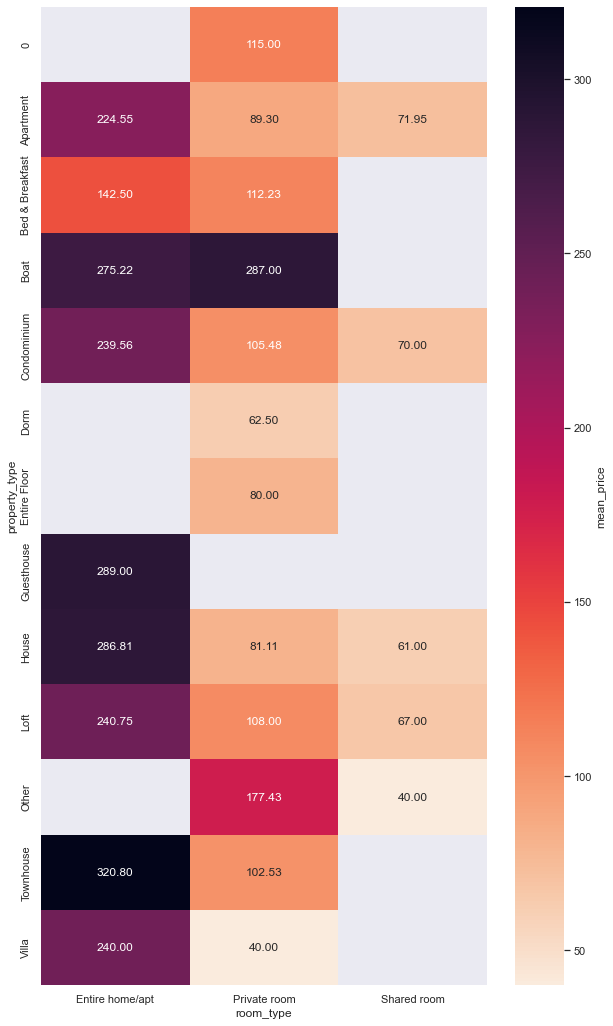

In [12]:
df_room_property = boston_listings_df[['property_type','room_type', 'price']]
df_room_property = df_room_property.groupby(['property_type','room_type'])['price'].mean()
plt.figure(figsize = (10,18))
sb.heatmap(df_room_property.unstack(), 
           annot=True, fmt=".2f", 
           cmap = sb.cm.rocket_r, 
           cbar_kws={'label': 'mean_price'})

In [13]:
import nltk
from nltk.corpus import stopwords
import re

# Create a dataframe of the words that appear in the ammenities section of the most expensive listings

amenitiesDF = boston_listings_df[['amenities','price','id',]]
amenitiesDFTopper = amenitiesDF.sort_values('price',ascending=[0])
# amenitiesDFtop=amenitiesDFTopper.head()
allemenities = ''
for index,row in amenitiesDFTopper.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenities+=p

allemenities_data=nltk.word_tokenize(allemenities)
filtered_data=[word for word in allemenities_data if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
allemenities_data=[wnl.lemmatize(data) for data in filtered_data]
allemenities_words=' '.join(allemenities_data)

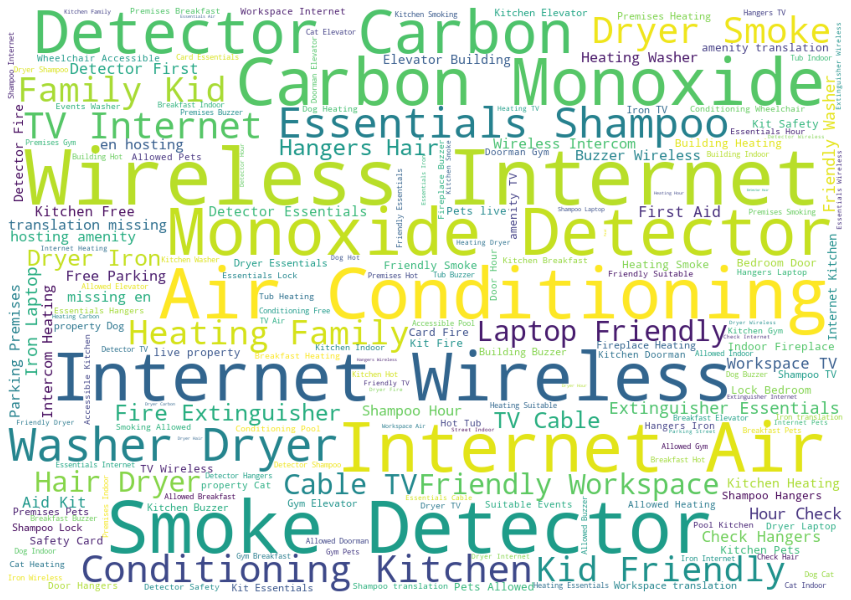

In [14]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width = 1000, height = 700, background_color="white").generate(allemenities_words)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Apply model

## Libraries

In [1]:
import warnings
from pandas.errors import SettingWithCopyWarning

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
# Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate

# Scale
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import mean_squared_error, r2_score

## Data

In [2]:
boston_listings_df = pd.read_csv('drafts/data/boston/listings.csv')

In [3]:
boston_newListingsDF = boston_listings_df[['room_type','property_type','bedrooms', 'bathrooms','amenities','number_of_reviews', 'price']]
boston_newListingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   room_type          3585 non-null   object 
 1   property_type      3582 non-null   object 
 2   bedrooms           3575 non-null   float64
 3   bathrooms          3571 non-null   float64
 4   amenities          3585 non-null   object 
 5   number_of_reviews  3585 non-null   int64  
 6   price              3585 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 196.2+ KB


## Data cleaning

###  Amenities
- Displays the different types of amenities available for each listing

To clean the data in this variable: 
- Checking and listing down all the different amenities that were offered
- Separating the different amenities and creating a dedicated column for each amenity
- Removing amenities which have NULL values for all listings

In [4]:
# Creating a set of all possible amenities
amenities_list = list(boston_newListingsDF.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)

In [5]:
# Creating column variables for each of the different amenities and adding them into the original dataframe
boston_newListingsDF.loc[boston_newListingsDF['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
boston_newListingsDF.loc[boston_newListingsDF['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
boston_newListingsDF.loc[boston_newListingsDF['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
boston_newListingsDF.loc[boston_newListingsDF['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
boston_newListingsDF.loc[boston_newListingsDF['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
boston_newListingsDF.loc[boston_newListingsDF['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
boston_newListingsDF.loc[boston_newListingsDF['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
boston_newListingsDF.loc[boston_newListingsDF['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
boston_newListingsDF.loc[boston_newListingsDF['amenities'].str.contains('TV'), 'tv'] = 1
boston_newListingsDF.loc[boston_newListingsDF['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
boston_newListingsDF.loc[boston_newListingsDF['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
boston_newListingsDF.loc[boston_newListingsDF['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
boston_newListingsDF.loc[boston_newListingsDF['amenities'].str.contains('Elevator'), 'elevator'] = 1
boston_newListingsDF.loc[boston_newListingsDF['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
boston_newListingsDF.loc[boston_newListingsDF['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
boston_newListingsDF.loc[boston_newListingsDF['amenities'].str.contains('parking'), 'parking'] = 1
boston_newListingsDF.loc[boston_newListingsDF['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
boston_newListingsDF.loc[boston_newListingsDF['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
boston_newListingsDF.loc[boston_newListingsDF['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
boston_newListingsDF.loc[boston_newListingsDF['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
boston_newListingsDF.loc[boston_newListingsDF['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
boston_newListingsDF.loc[boston_newListingsDF['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
boston_newListingsDF.loc[boston_newListingsDF['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
boston_newListingsDF.loc[boston_newListingsDF['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
boston_newListingsDF.loc[boston_newListingsDF['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
boston_newListingsDF.loc[boston_newListingsDF['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
boston_newListingsDF.loc[boston_newListingsDF['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
boston_newListingsDF.loc[boston_newListingsDF['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

In [6]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = boston_newListingsDF.iloc[:,41:].columns
boston_newListingsDF[cols_to_replace_nulls] = boston_newListingsDF[cols_to_replace_nulls].fillna(0)

# Dropping the original amenities variable
boston_newListingsDF.drop('amenities', axis=1, inplace=True)

In [7]:
# Removing the amenities which have all NULL values for all listings
boston_newListingsDF = boston_newListingsDF.dropna(axis=1, how='all')
boston_newListingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   room_type              3585 non-null   object 
 1   property_type          3582 non-null   object 
 2   bedrooms               3575 non-null   float64
 3   bathrooms              3571 non-null   float64
 4   number_of_reviews      3585 non-null   int64  
 5   price                  3585 non-null   object 
 6   breakfast              316 non-null    float64
 7   tv                     2725 non-null   float64
 8   white_goods            3015 non-null   float64
 9   elevator               868 non-null    float64
 10  gym                    479 non-null    float64
 11  hot_tub_sauna_or_pool  160 non-null    float64
 12  internet               3459 non-null   float64
 13  pets_allowed           806 non-null    float64
 14  secure                 458 non-null    float64
 15  acce

### Property Type
- Displays the property type of a listing

To clean the data in this variable: 
- Grouping property types whose low counts might be insignificant and not provide us with enough information
- Thus, grouping property types that have counts that are < 30

In [8]:
# Checking to see the total number of each type of property 
boston_newListingsDF['property_type'].value_counts()

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Camper/RV             1
Name: property_type, dtype: int64

In [9]:
# Grouping property types with less than <30 count into 'Other'
boston_newListingsDF.loc[~boston_newListingsDF.property_type.isin(['House', 'Apartment','Townhouse','Condominium','Loft',"Bed & Breakfast"]), 'property_type'] = 'Other'
boston_newListingsDF.property_type.value_counts()

Apartment          2612
House               562
Condominium         231
Townhouse            54
Other                46
Bed & Breakfast      41
Loft                 39
Name: property_type, dtype: int64

### Price
Since the Price variable is currently a string (with the "$" symbol), the variable is thus converted into an integer 

In [10]:
boston_newListingsDF.price = boston_newListingsDF.price.str[1:-3]
boston_newListingsDF.price = boston_newListingsDF.price.str.replace(",", "")
boston_newListingsDF.price = boston_newListingsDF.price.astype(float)
boston_newListingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   room_type              3585 non-null   object 
 1   property_type          3585 non-null   object 
 2   bedrooms               3575 non-null   float64
 3   bathrooms              3571 non-null   float64
 4   number_of_reviews      3585 non-null   int64  
 5   price                  3585 non-null   float64
 6   breakfast              316 non-null    float64
 7   tv                     2725 non-null   float64
 8   white_goods            3015 non-null   float64
 9   elevator               868 non-null    float64
 10  gym                    479 non-null    float64
 11  hot_tub_sauna_or_pool  160 non-null    float64
 12  internet               3459 non-null   float64
 13  pets_allowed           806 non-null    float64
 14  secure                 458 non-null    float64
 15  acce

In [11]:
# To convert NaN values to 0 for preparation for Modelling
boston_newListingsDF = boston_newListingsDF.fillna(0)
# Checking to ensure that there are no NULL entries
boston_newListingsDF.isnull().sum()

room_type                0
property_type            0
bedrooms                 0
bathrooms                0
number_of_reviews        0
price                    0
breakfast                0
tv                       0
white_goods              0
elevator                 0
gym                      0
hot_tub_sauna_or_pool    0
internet                 0
pets_allowed             0
secure                   0
accessible               0
dtype: int64

## Regression model
- Linear Regression
- Random Forest Regression

In [12]:
# One-hot encode the Categorial variables
transformedDF = pd.get_dummies(boston_newListingsDF, columns=['room_type','property_type'])

#renaming some categories to remove '/' and blank spaces
newTransformedDF = transformedDF.rename(columns={'room_type_Entire home/apt': 'room_type_Entire_home_apt'})
newTransformedDF = newTransformedDF.rename(columns={'room_type_Private room': 'room_type_Private_room'})
newTransformedDF = newTransformedDF.rename(columns={'room_type_Shared room': 'room_type_Shared_room'})
newTransformedDF = newTransformedDF.rename(columns={'property_type_Bed & Breakfast': 'property_type_Bed_and_Breakfast'})

newTransformedDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   bedrooms                         3585 non-null   float64
 1   bathrooms                        3585 non-null   float64
 2   number_of_reviews                3585 non-null   int64  
 3   price                            3585 non-null   float64
 4   breakfast                        3585 non-null   float64
 5   tv                               3585 non-null   float64
 6   white_goods                      3585 non-null   float64
 7   elevator                         3585 non-null   float64
 8   gym                              3585 non-null   float64
 9   hot_tub_sauna_or_pool            3585 non-null   float64
 10  internet                         3585 non-null   float64
 11  pets_allowed                     3585 non-null   float64
 12  secure              

In [13]:
# Separating X and y for Modelling
X = pd.DataFrame(newTransformedDF[["bedrooms", "bathrooms","tv", "elevator","gym", "hot_tub_sauna_or_pool",
                              "internet", "pets_allowed", "property_type_Bed_and_Breakfast", "room_type_Entire_home_apt",
                              "room_type_Private_room", "room_type_Shared_room","property_type_Condominium", 
                              "property_type_House","property_type_Loft", "property_type_Other", "property_type_Townhouse"]]) #Predictor Variables
y = pd.DataFrame(newTransformedDF["price"]) #Response Variables

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [14]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Model 1: Linear Regression

In [15]:
linreg = LinearRegression()     
linreg.fit(X_train, y_train)

LinearRegression()

In [16]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))


Intercept of Regression 	: b =  [172.42889917]

                         Predictors  Coefficients
0                          bedrooms  3.445773e+01
1                         bathrooms  1.397205e+01
2                                tv  1.169683e+01
3                          elevator  1.780596e+01
4                               gym  4.668316e-01
5             hot_tub_sauna_or_pool -1.821196e+00
6                          internet -1.705249e+00
7                      pets_allowed -1.521977e-01
8   property_type_Bed_and_Breakfast  3.492683e+00
9         room_type_Entire_home_apt -1.540254e+14
10           room_type_Private_room -1.525301e+14
11            room_type_Shared_room -4.631471e+13
12        property_type_Condominium  1.134232e+00
13              property_type_House -4.726250e+00
14               property_type_Loft -8.927170e-01
15              property_type_Other  4.842810e+00
16          property_type_Townhouse  2.967959e+00


In [17]:
# Predict Response corresponding to Predictors
trainPredictionLR = linreg.predict(X_train)
testPredictionLR = linreg.predict(X_test)

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

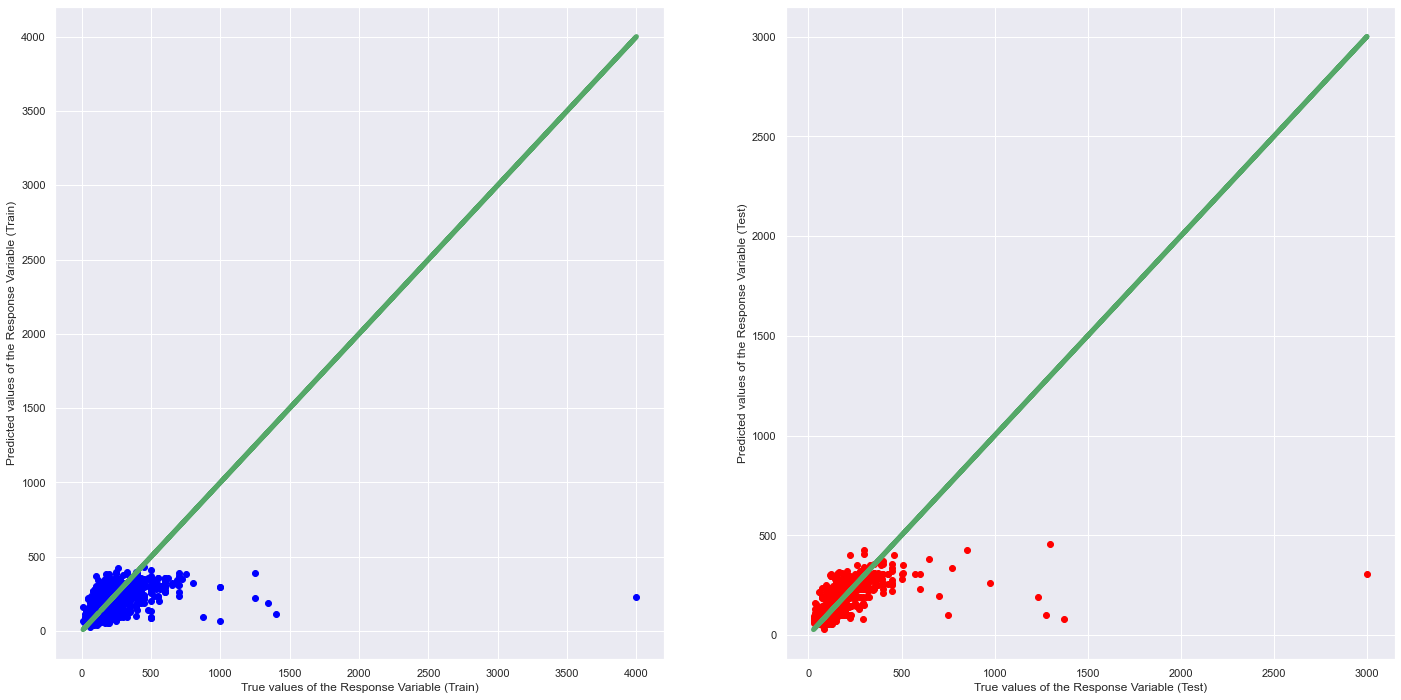

In [18]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionLR, color = "blue")
axes[0].plot(y_train['price'], y_train['price'], 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictionLR, color = "red")
axes[1].plot(y_test['price'], y_test['price'], 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")


### Model 2: Random Forest Regression

In [19]:
# Tuning of Parameters
random_grid = {'n_estimators': [2000],
               'max_features': [2,5],
               'max_depth': [40,70],
               'min_samples_split': [40,50],
               'max_leaf_nodes':[50,70],
               'max_features': [2,5]}
rf_tune = RandomForestRegressor()
rf_random = GridSearchCV(estimator = rf_tune, param_grid = random_grid, cv = 3, verbose=2,n_jobs = 2)

rf_random.fit(X_train,y_train)

print(rf_random.best_estimator_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
RandomForestRegressor(max_depth=70, max_features=5, max_leaf_nodes=50,
                      min_samples_split=50, n_estimators=2000)


In [24]:
# Creating and fitting the model
RF = RandomForestRegressor(n_estimators=2000, 
                           max_depth=70,
                           min_samples_split=40,
                           max_leaf_nodes=50,
                           max_features=5).fit(X_train,y_train)

# Predicting the training and testing sets
trainPredictin_RF = RF.predict(X_train)
testPredictin_RF =RF.predict(X_test)

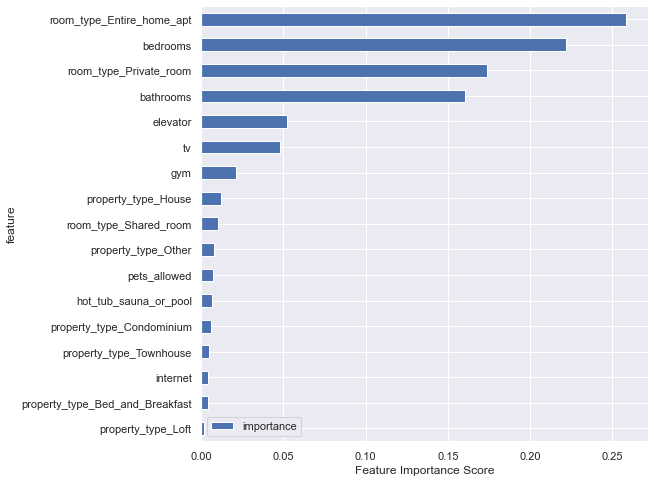

In [25]:
feat_imp = pd.DataFrame({'importance':RF.feature_importances_})  
feat_imp['feature'] = X_train.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)

feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(figsize=(8,8))
plt.xlabel('Feature Importance Score')
plt.show()

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

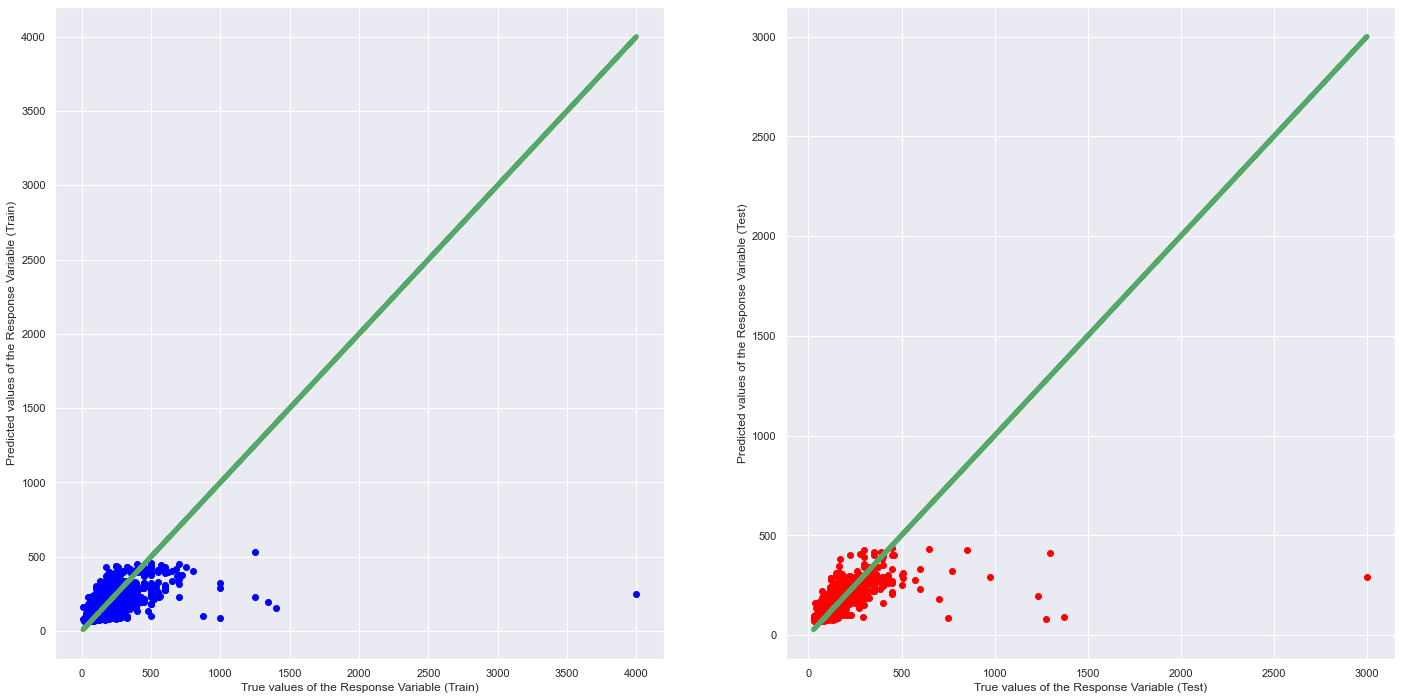

In [26]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictin_RF, color = "blue")
axes[0].plot(y_train['price'], y_train['price'], 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictin_RF, color = "red")
axes[1].plot(y_test['price'], y_test['price'], 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

### Evaluation of Models

#### Train Test Split
Validation of model performance:
- Train - Test ratio: 80% - 20% 
- Random state: 2 

In [27]:
# Results of Model
print ("Goodness Fit on the Models (Train/Test Split):")
test_df = pd.DataFrame(
    index=['Linear Regression', 'Random Forest Regression'],
    data={
    'MSE': [
        round(mean_squared_error(y_test, testPredictionLR),4), 
        round(mean_squared_error(y_test, testPredictin_RF),4)
    ],
    'R^2': [
        round(r2_score(y_test, testPredictionLR),4),
        round(r2_score(y_test, testPredictin_RF),4)
    ]
})
train_df = pd.DataFrame(
    index=['Linear Regression', 'Random Forest Regression'],
    data={
    'MSE': [
        round(mean_squared_error(y_train, trainPredictionLR),4), 
        round(mean_squared_error(y_train, trainPredictin_RF),4)
    ],
    'R^2': [
        round(r2_score(y_train, trainPredictionLR),4),
        round(r2_score(y_train, trainPredictin_RF),4)
    ]
})
print(test_df, '\n')
print(train_df)

Goodness Fit on the Models (Train/Test Split):
                                 MSE     R^2
Linear Regression         23602.8307  0.2438
Random Forest Regression  23677.8214  0.2414 

                                 MSE     R^2
Linear Regression         13388.4883  0.3197
Random Forest Regression  12415.6525  0.3692
